In [2]:
import pandas as pd

import numpy as np

import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt

from scipy import stats
from statsmodels.stats.proportion import proportions_ztest

## [타이타닉]

###### 분석 전 예상
###### : 여성 탑승객 생존율이 남성 탑승객 생존율보다 높을 것이다.
######  승객 등급은 3객석 탑승객이 가장 많은 사망율을 보일 것이다.
######  승객이 탑승한 곳은 생존에 영향을 미치지 않았을 것이다.

In [3]:
#타이타닉 데이터 읽어오기
df_titanic=pd.read_csv("/home/piai/22기 최예진/230510/1 Big Data 분석 기초/titanic.csv",encoding='euc-kr')
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#데이터 속성 확인하기
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
#데이터 속성 확인하기
df_titanic.shape

(891, 12)

In [6]:
# 기술통계량 확인하기
df_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.758889,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002570,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,30.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [33]:
df_titanic['Sex'].count()

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object

In [7]:
#결측치 확인하기
df_titanic.isnull().head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False


In [8]:
#결측치 빈도 확인
df_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
#최빈값 확인하기
df_titanic['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [10]:
#결측치 최빈값으로 대체하기
df_titanic["Embarked"].fillna("S",inplace=True)
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [32]:
#객실번호는 첫자리만 별도의 변수로 생성
df_titanic["Cabin"].fillna("etc",inplace=True)
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Cabin_g,Agegroup,Family,Faregroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,etc,S,e,Young,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,C,Middle,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,etc,S,e,Young,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,C,Middle,1,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,etc,S,e,Middle,0,0


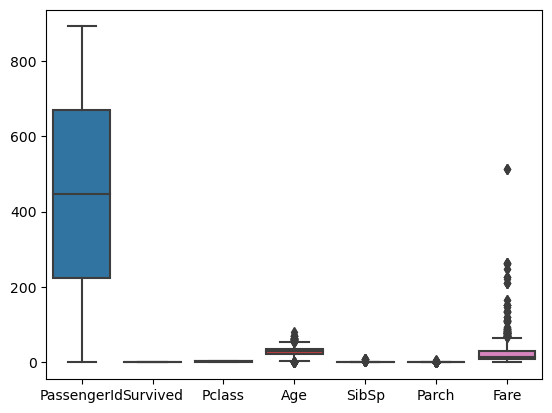

In [12]:
#이상치 확인
sns.boxplot(data=df_titanic);

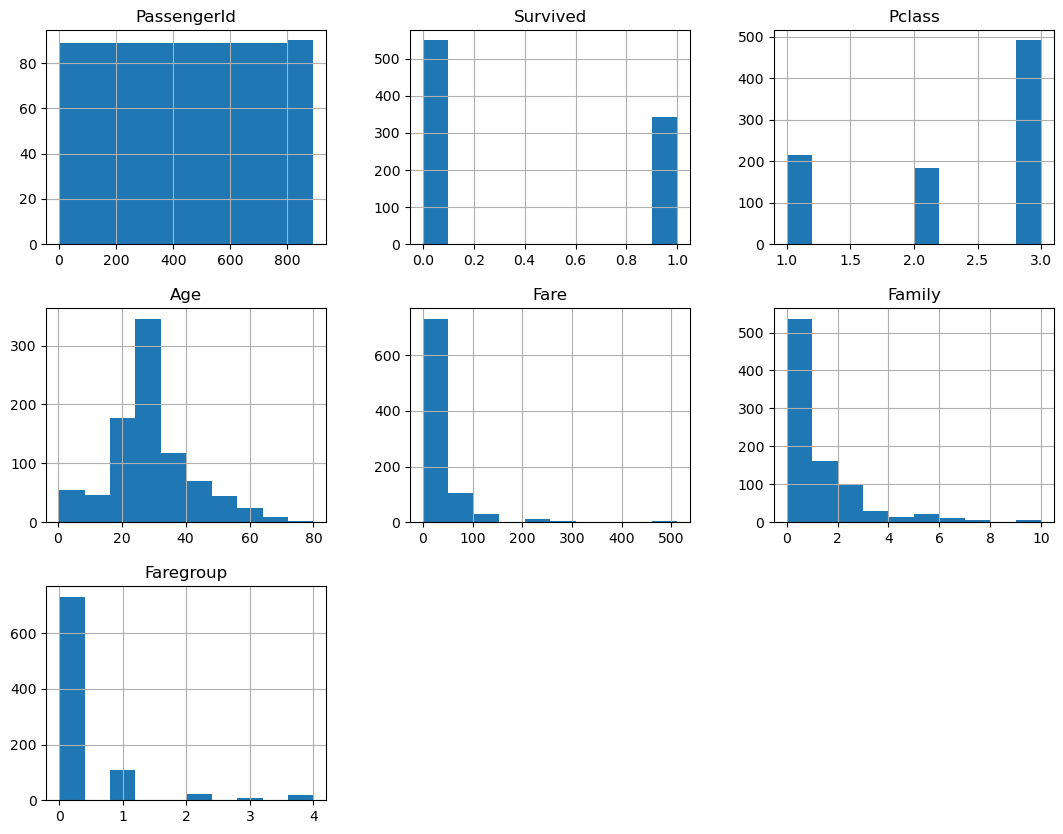

In [27]:
#이상치 확인
df_titanic.hist(figsize=(13,10));

In [14]:
#객실번호는 첫자리만 별도의 변수로 생성
df_titanic['Cabin_g']=df_titanic['Cabin'].str.get(i=0)

In [15]:
df_titanic["Cabin_g"]

0      e
1      C
2      e
3      C
4      e
      ..
886    e
887    B
888    e
889    C
890    e
Name: Cabin_g, Length: 891, dtype: object

In [16]:
# 나이에 대한 파생변수 생성
def age(x) :
    if x <= 14 :
        return "Child"
    elif x <= 28:
        return "Young"
    elif x<=45:
        return "Middle"
    elif x<=56:
        return "Prime"
    else:
        return "Old"
    
df_titanic["Agegroup"] = df_titanic["Age"].apply(age)

In [17]:
#가족수 계산
df_titanic["Family"] = df_titanic["Parch"] + df_titanic["SibSp"]

In [18]:
#삭제
df_titanic.drop(['Parch','SibSp'],axis=1,inplace=True)

In [19]:
#요금 구간화
def fare(x) :
    if x<=50 :
        return 0
    elif x<=100 :
        return 1
    elif x<=150 :
        return 2
    elif x<=200 :
        return 3
    else:
        return 4
    
df_titanic["Faregroup"] = df_titanic["Fare"].apply(fare)

In [20]:
df_titanic['Fare']

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

In [21]:
df_titanic['Faregroup']

0      0
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    0
889    0
890    0
Name: Faregroup, Length: 891, dtype: int64

In [22]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Cabin_g,Agegroup,Family,Faregroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,etc,S,e,Young,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,C,Middle,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,etc,S,e,Young,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,C,Middle,1,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,etc,S,e,Middle,0,0


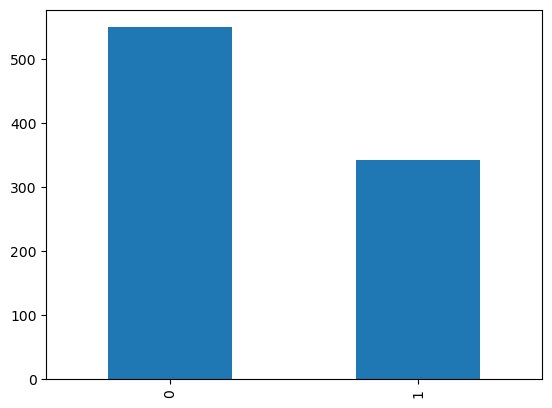

In [23]:
#목표변수_막대그래프 작성하기
df_count_b=df_titanic["Survived"].value_counts()
df_count_b.sort_index(inplace=True); 
df_count_b.plot.bar();

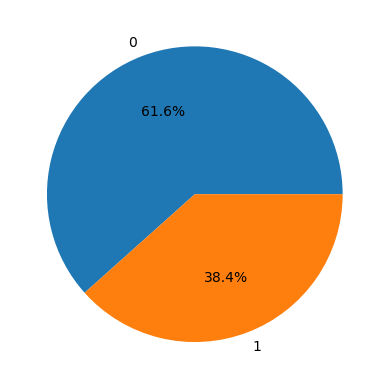

In [24]:
#목표변수_파이차트 작성하기
df_count_p=df_titanic.groupby(["Survived"]).size()
df_count_p.plot.pie(autopct="%.1f%%");

###### 생존율을 비교했을때 사망자의 비율이 많은것을 확인할 수 있다.

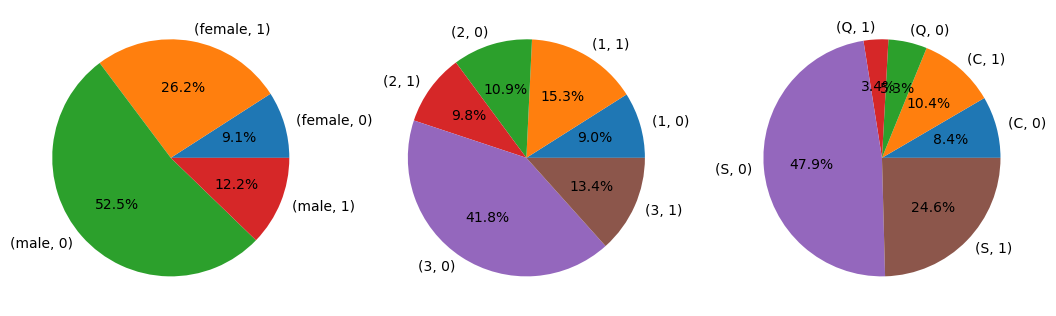

In [30]:
#범주형변수_파이차트
fig,axes=plt.subplots(1,3,figsize=(13,10))

df_count_pp=df_titanic.groupby(["Sex", "Survived"]).size()
df_count_pp.plot.pie(ax=axes[0],autopct="%.1f%%");

df_count_pp=df_titanic.groupby(["Pclass", "Survived"]).size()
df_count_pp.plot.pie(ax=axes[1],autopct="%.1f%%");

df_count_pp=df_titanic.groupby(["Embarked", "Survived"]).size()
df_count_pp.plot.pie(ax=axes[2],autopct="%.1f%%");

###### 여성 탑승객의 생존율이 남성 탑승객의 생존율보다 높은걸로 보아 여성 탑승객을 먼저 내보내준 것으로 보인다.
###### 또, 승객 등급에서 보이는바와 같이 1,2,3등석 중 3등석의 사망자가 다수 발생한걸로 보아 3등석의 객실 위치로 인해 시간내 빠져나가지 못한걸로 보인다.
###### 승객이 탑승한 곳으로 비교해보면 S(Southampton)에서 탑승한 탑승객들의 사망률이 가장 높은것을 볼 수 있다.

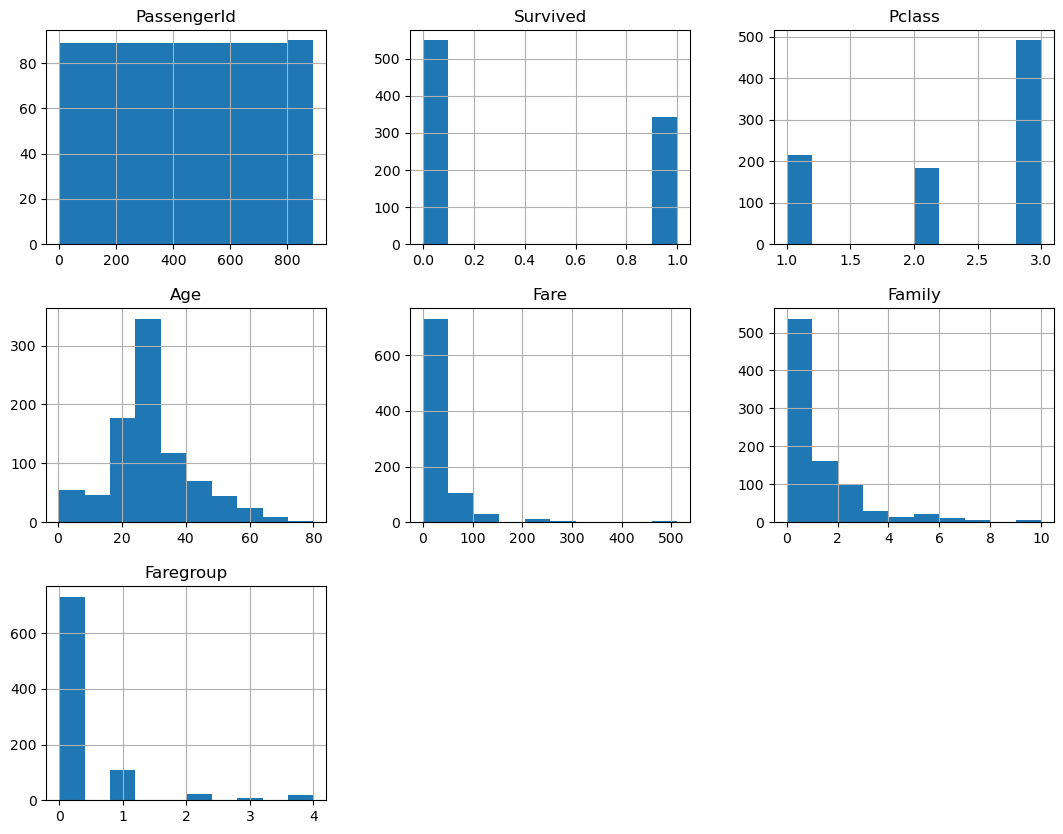

In [51]:
#연속형 변수에 대한 분포 확인
df_titanic.hist(figsize=(13,10));

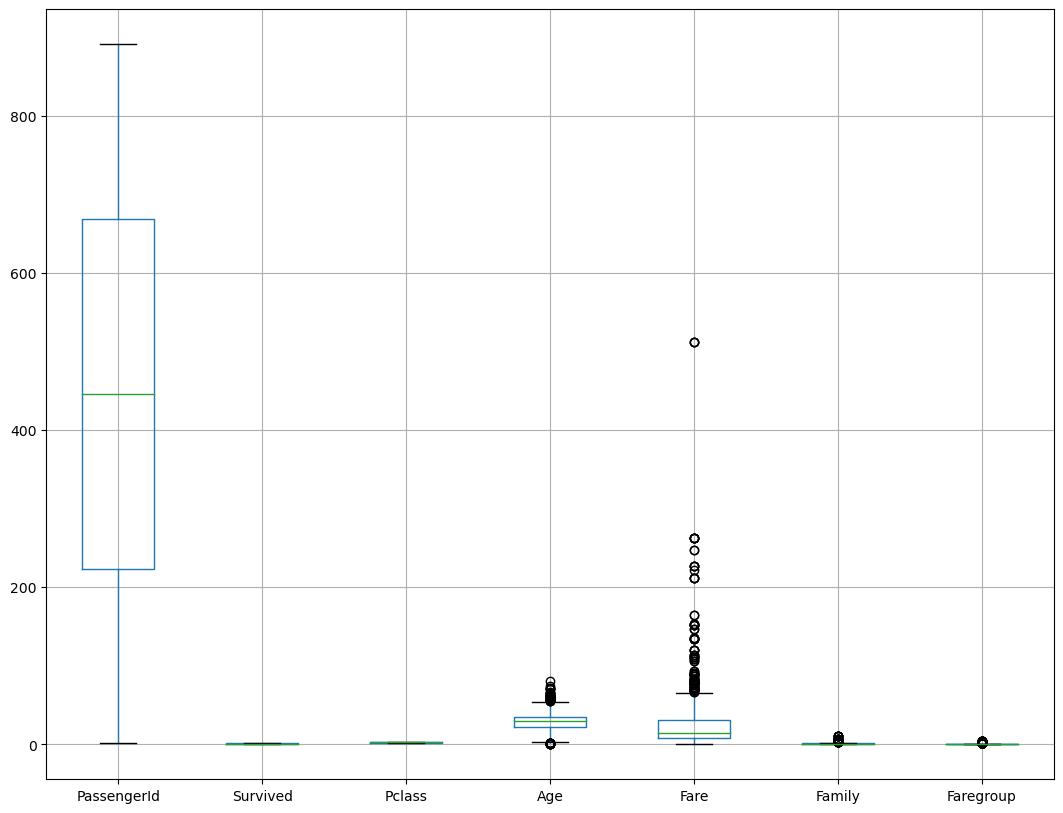

In [52]:
#연속형 변수에 대한 분포 확인
df_titanic.boxplot(figsize=(13,10));

### 기술통계_실습1

In [35]:
#데이터를 읽어온다
ds_mycars=pd.read_csv("/home/piai/22기 최예진/230510/1 Big Data 분석 기초/mycars.csv")
ds_mycars.head()

,manufacturer,model,displacement,year,cylinder,automatic,driving,mpg,highway_mileage,fuel,class
0,audi,a4,1.8,1999,4,auto,f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual,f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual,f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto,f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto,f,16,26,p,compact


In [36]:
#요약 통계량
ds_mycars.describe().round(3)

,displacement,year,cylinder,mpg,highway_mileage
count,234.000,234.00,234.000,234.000,234.000
mean,3.472,2003.50,5.889,16.859,23.440
std,1.292,4.51,1.612,4.256,5.955
min,1.600,1999.00,4.000,9.000,12.000
25%,2.400,1999.00,4.000,14.000,18.000
50%,3.300,2003.50,6.000,17.000,24.000
75%,4.600,2008.00,8.000,19.000,27.000
max,7.000,2008.00,8.000,35.000,44.000


In [37]:
#시내에서 연비 통계치
df=ds_mycars[['driving','mpg']]
df.groupby('driving').describe()

mpg                                                   
         count       mean       std   min   25%   50%   75%   max
driving                                                          
4        103.0  14.330097  2.874459   9.0  13.0  14.0  16.0  21.0
f        106.0  19.971698  3.626510  11.0  18.0  19.0  21.0  35.0
r         25.0  14.080000  2.215852  11.0  12.0  15.0  15.0  18.0

In [38]:
#고속도로에서 연비 통계치
df=ds_mycars[['driving','highway_mileage']]
df.groupby('driving').describe()

highway_mileage                                                   
                  count       mean       std   min   25%   50%   75%   max
driving                                                                   
4                 103.0  19.174757  4.078704  12.0  17.0  18.0  22.0  28.0
f                 106.0  28.160377  4.206881  17.0  26.0  28.0  29.0  44.0
r                  25.0  21.000000  3.662877  15.0  17.0  21.0  24.0  26.0

### 기술통계_실습2

In [39]:
#데이터 가져오기
ds_mycars=pd.read_csv("/home/piai/22기 최예진/230510/1 Big Data 분석 기초/mycars.csv")
df=ds_mycars[['driving','model']]

In [42]:
#변수,계산
count1=df['driving'].value_counts().sort_index()
#누적
cumcnt=np.cumsum(count)

percent=count/sum(count1)*100
#누적
cumpct=np.cumsum(percent)

In [43]:
#DataFrame으로 취합 및 결과 확인(구동방식)
count_data=pd.DataFrame({'Count':count,'CumCnt':cumcnt,'Percent':percent,'CumPct':cumpct})
count_data.columns.name='driving'
count_data

driving,Count,CumCnt,Percent,CumPct
4,103,103,44.017094,44.017094
f,106,209,45.299145,89.316239
r,25,234,10.683761,100.000000


In [46]:
#변수,계산
count2=df['model'].value_counts().sort_index()

cumcnt=np.cumsum(count)

percent=count/sum(count2)*100

cumpct=np.cumsum(percent)

In [47]:
#DataFrame으로 취합 및 결과 확인(모델)
count_data=pd.DataFrame({'Count':count,'CumCnt':cumcnt,'Percent':percent,'CumPct':cumpct})
count_data.columns.name='model'
count_data

model,Count,CumCnt,Percent,CumPct
4runner 4wd,6,6,2.564103,2.564103
a4,7,13,2.991453,5.555556
a4 quattro,8,21,3.418803,8.974359
a6 quattro,3,24,1.282051,10.256410
altima,6,30,2.564103,12.820513
c1500 suburban 2wd,5,35,2.136752,14.957265
camry,7,42,2.991453,17.948718
camry solara,7,49,2.991453,20.940171
caravan 2wd,11,60,4.700855,25.641026
civic,9,69,3.846154,29.487179


### 확률분포 실습1

In [48]:
mu=175
sigma=5
x=180
prob=stats.norm.cdf(x,mu,sigma)
print("{0}cm 일 경우에 나의 위치: {1:.1F}%".format(x,(1-prob)*100))

180cm 일 경우에 나의 위치: 15.9%


### 확률분포 실습2

In [49]:
mu=12
sigma=3
x1=9
x2=15

prob1=stats.norm.cdf(x1,mu,sigma)
prob2=stats.norm.cdf(x2,mu,sigma)
print("{0}km 이상 {1}km 이하를 달릴 확률은 {2:.3f}에 해당함".format(x1,x2,(prob2-prob1)))

9km 이상 15km 이하를 달릴 확률은 0.683에 해당함


In [50]:
print("{0}km 이상 달릴 확률은 {1:.3f}에 해당함".format(x2,(1-prob2)))

15km 이상 달릴 확률은 0.159에 해당함
